In [37]:
from PIL import Image
import os
import pandas as pd
import numpy as np
import datasets
from tqdm import tqdm
from datasets import Image as Image_ds # change name because of similar PIL module
from datasets import Dataset
from datasets import load_dataset
import urllib.parse
import json
import pickle
import matplotlib.pyplot as plt 
from sklearn.neighbors import NearestNeighbors
import sys
sys.path.append(os.path.abspath(".."))
from src.utils import plot_neighbors, pca_binary, plot_pca_scale
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from matplotlib.patches import Patch
from sklearn.metrics.pairwise import cosine_distances
import seaborn as sns
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

# we get a lot of annoying warnings from sklearn so we suppress them
import warnings
warnings.filterwarnings('ignore')

In [22]:
# read df from pickle 
data_path = os.path.join('..', 'data')
df = pd.read_pickle(os.path.join(data_path, 'paintings_canonized.pkl'))

In [23]:
# load image data
ds = load_dataset("louisebrix/smk_only_paintings", split="train") # all the data is in the 'train' split

Generating train split: 100%|██████████| 1687/1687 [00:00<00:00, 5824.43 examples/s]


In [26]:
# define color subset

# make subset of colored images only 
color_subset = df.query('rgb == "color"')
color_idx = color_subset.index.tolist()
ds_color = ds.select(color_idx)
color_subset = color_subset.reset_index(drop = True)

### PCA with images

Code taken from https://fcpython.com/visualisation/creating-scatter-plots-with-club-logos-in-python

 https://nextjournal.com/ml4a/image-t-sne 

In [27]:
# 
def getImage(img):
    return OffsetImage(np.array(img), zoom=.02, alpha = 1)


In [28]:
def pca_binary(ax, df, ds, embedding, filename):
    embeddings_array = np.array(df[embedding].to_list(), dtype=np.float32)

    # to 2 dimensions
    pca = PCA(n_components=2)
    pca_results = pca.fit_transform(embeddings_array)
    df_pca = pd.DataFrame(pca_results, columns=["PCA1", "PCA2"])
    
    ax.scatter(df_pca["PCA1"], df_pca["PCA2"], color='white')

    ax.set_xlabel("PCA1")
    ax.set_ylabel("PCA2")

    ax.axis("equal")
    ax.set_axis_off()

    for index, row in df_pca.iterrows():
        # add images to plot
        ab = AnnotationBbox(getImage(ds[index]['image']), (row["PCA1"], row["PCA2"]), frameon=False)
        ax.add_artist(ab)

    plt.savefig(filename)

    np.seterr(divide='ignore', invalid='ignore')

/Users/au672746/Library/CloudStorage/OneDrive-Aarhusuniversitet/CHC/canon-paintings-smk/env/lib/python3.13/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/au672746/Library/CloudStorage/OneDrive-Aarhusuniversitet/CHC/canon-paintings-smk/env/lib/python3.13/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/au672746/Library/CloudStorage/OneDrive-Aarhusuniversitet/CHC/canon-paintings-smk/env/lib/python3.13/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/au672746/Library/CloudStorage/OneDrive-Aarhusuniversitet/CHC/canon-paintings-smk/env/lib/python3.13/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/au672746/Library/CloudStorage/OneDrive-Aarhusuniversitet/CHC/canon-paintin

Text(0.5, 0.98, 'PCA with paintings, greyscale')

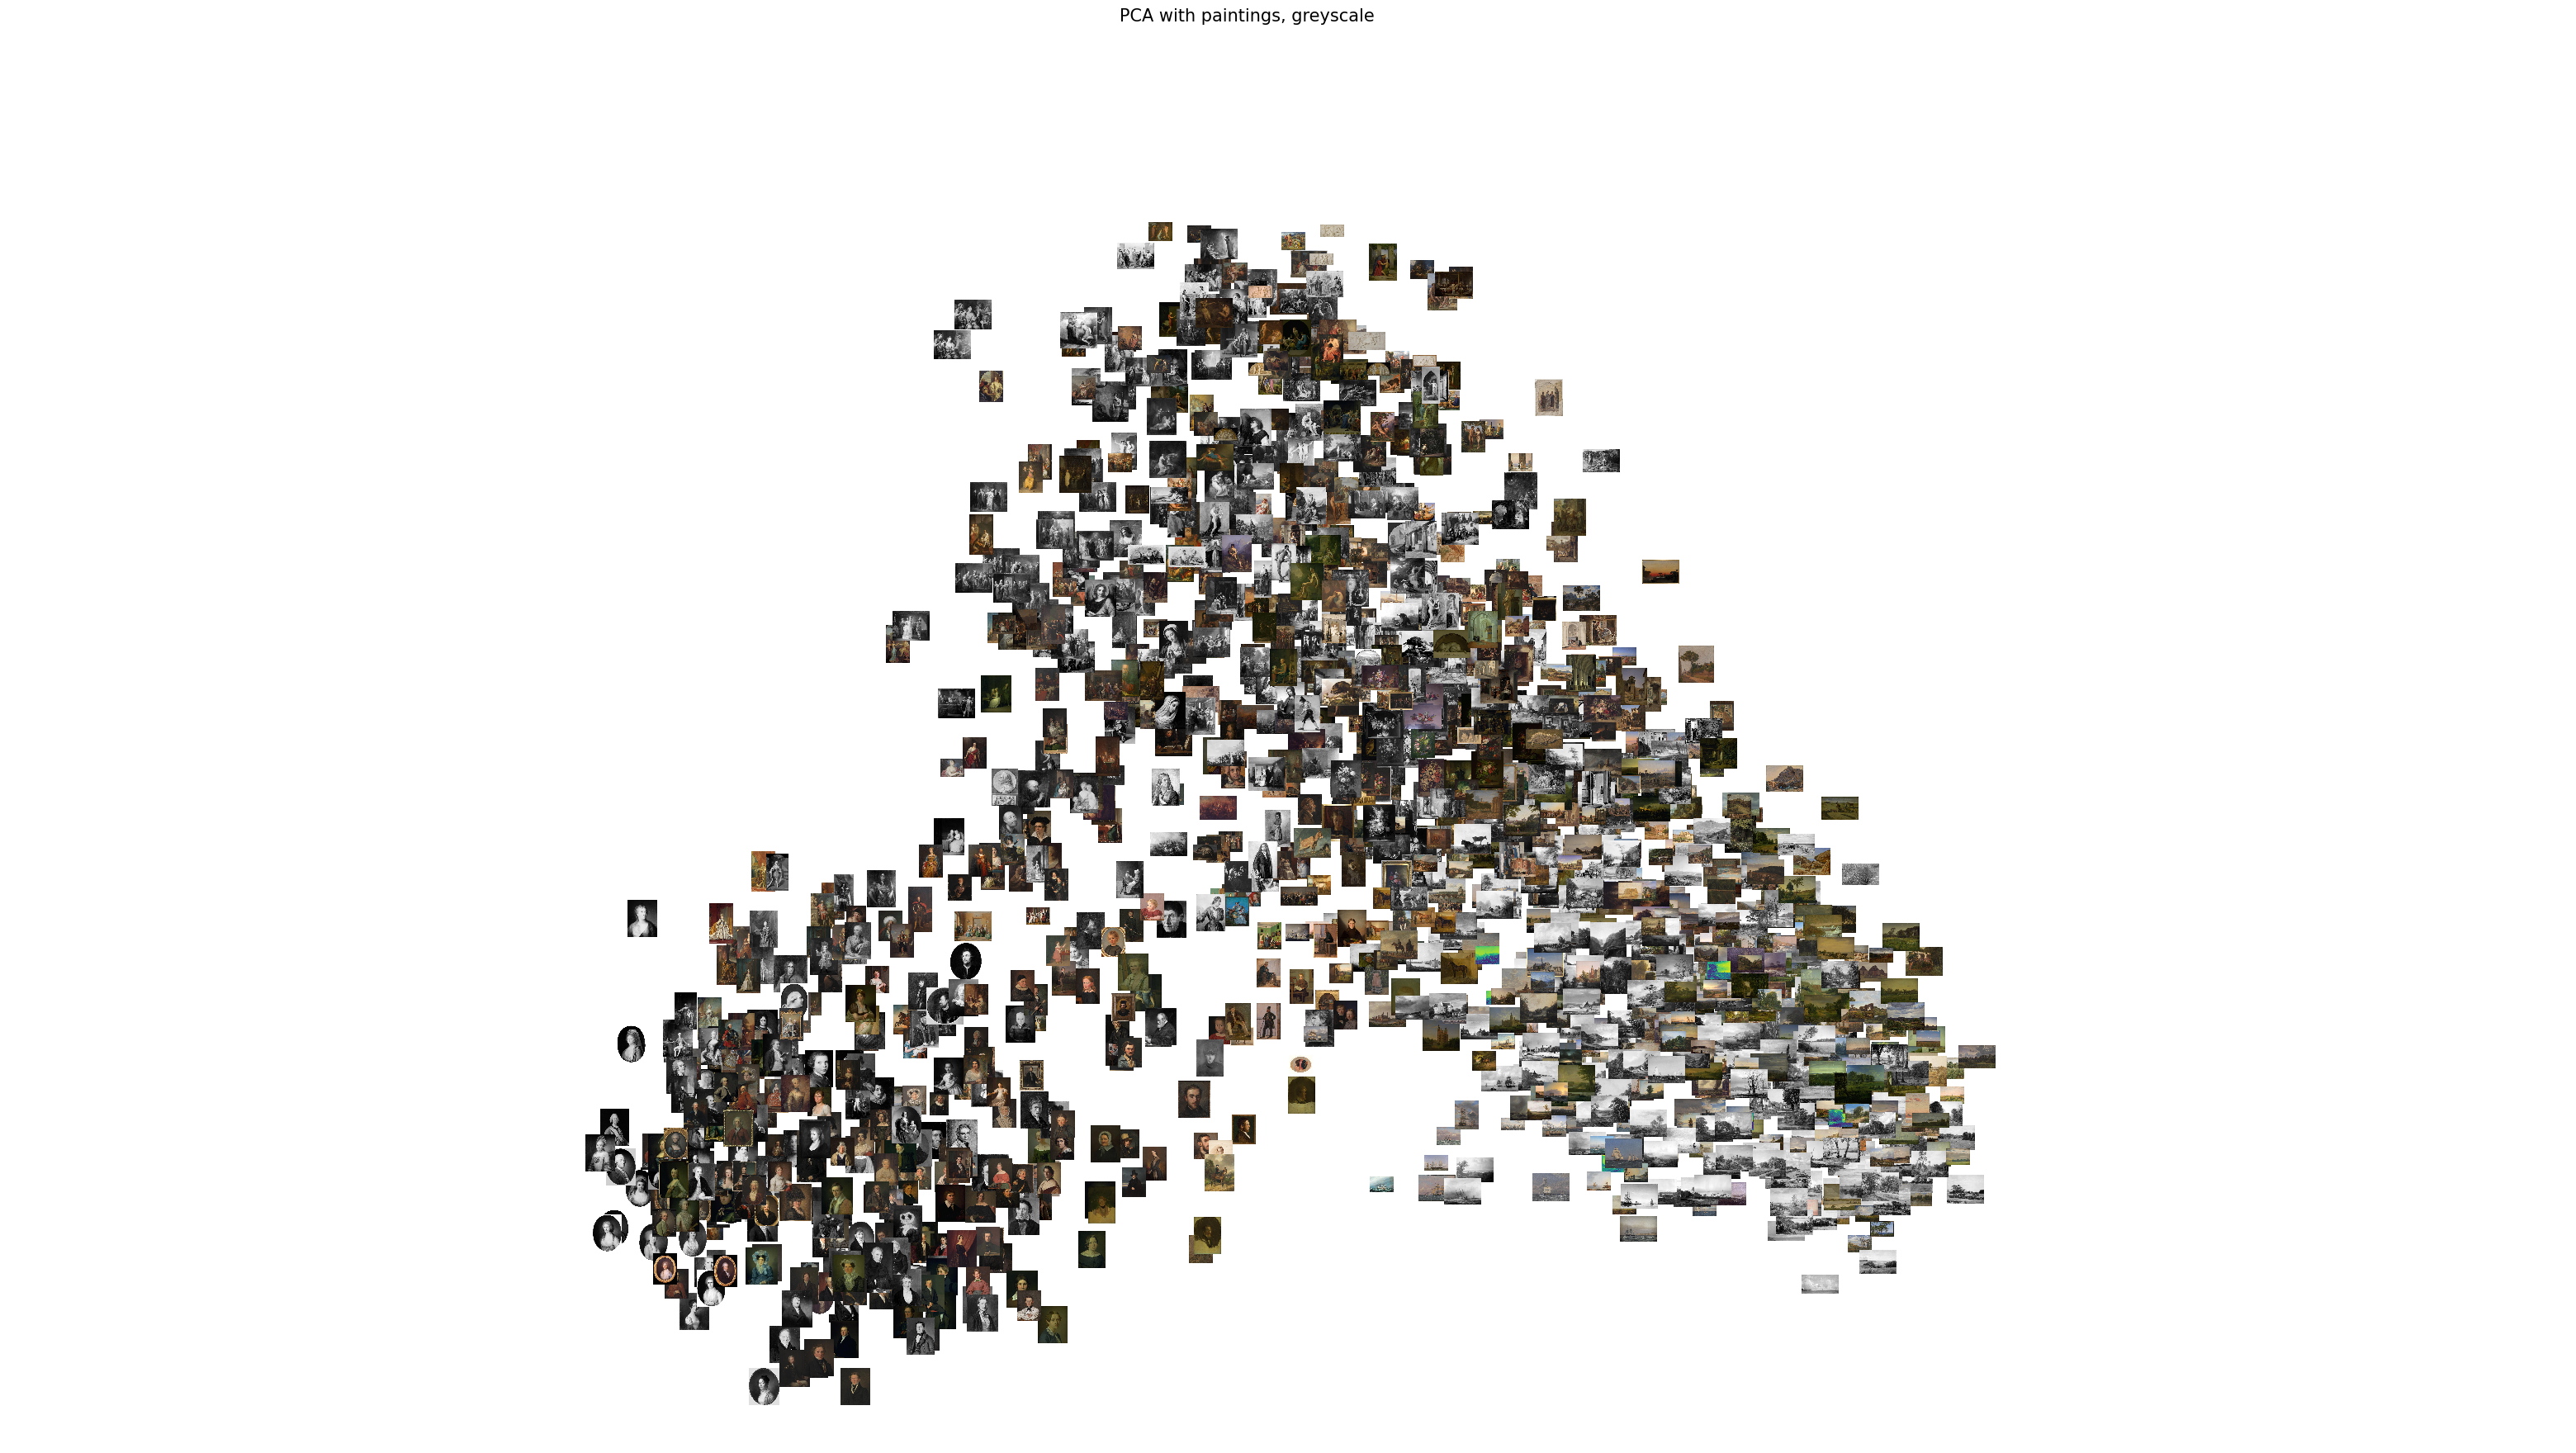

In [8]:
fig, axs = plt.subplots(1, 1, figsize=(40, 20))

pca_binary(axs, df, ds, 'grey_embedding', 'pca_paintings_grey.png')

fig.suptitle('PCA with paintings, greyscale', size = 15)


/Users/au672746/Library/CloudStorage/OneDrive-Aarhusuniversitet/CHC/canon-paintings-smk/env/lib/python3.13/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/au672746/Library/CloudStorage/OneDrive-Aarhusuniversitet/CHC/canon-paintings-smk/env/lib/python3.13/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/au672746/Library/CloudStorage/OneDrive-Aarhusuniversitet/CHC/canon-paintings-smk/env/lib/python3.13/site-packages/sklearn/utils/extmath.py:340: RuntimeWarning: overflow encountered in matmul
  Q, _ = qr_normalizer(A @ Q)
/Users/au672746/Library/CloudStorage/OneDrive-Aarhusuniversitet/CHC/canon-paintings-smk/env/lib/python3.13/site-packages/sklearn/utils/extmath.py:533: RuntimeWarning: overflow encountered in matmul
  B = Q.T @ M
/Users/au672746/Library/CloudStorage/OneDrive-Aarhusuniversitet/CHC/canon-paintings-smk/env/lib/python3.13/s

Text(0.5, 0.98, 'PCA with paintings, color')

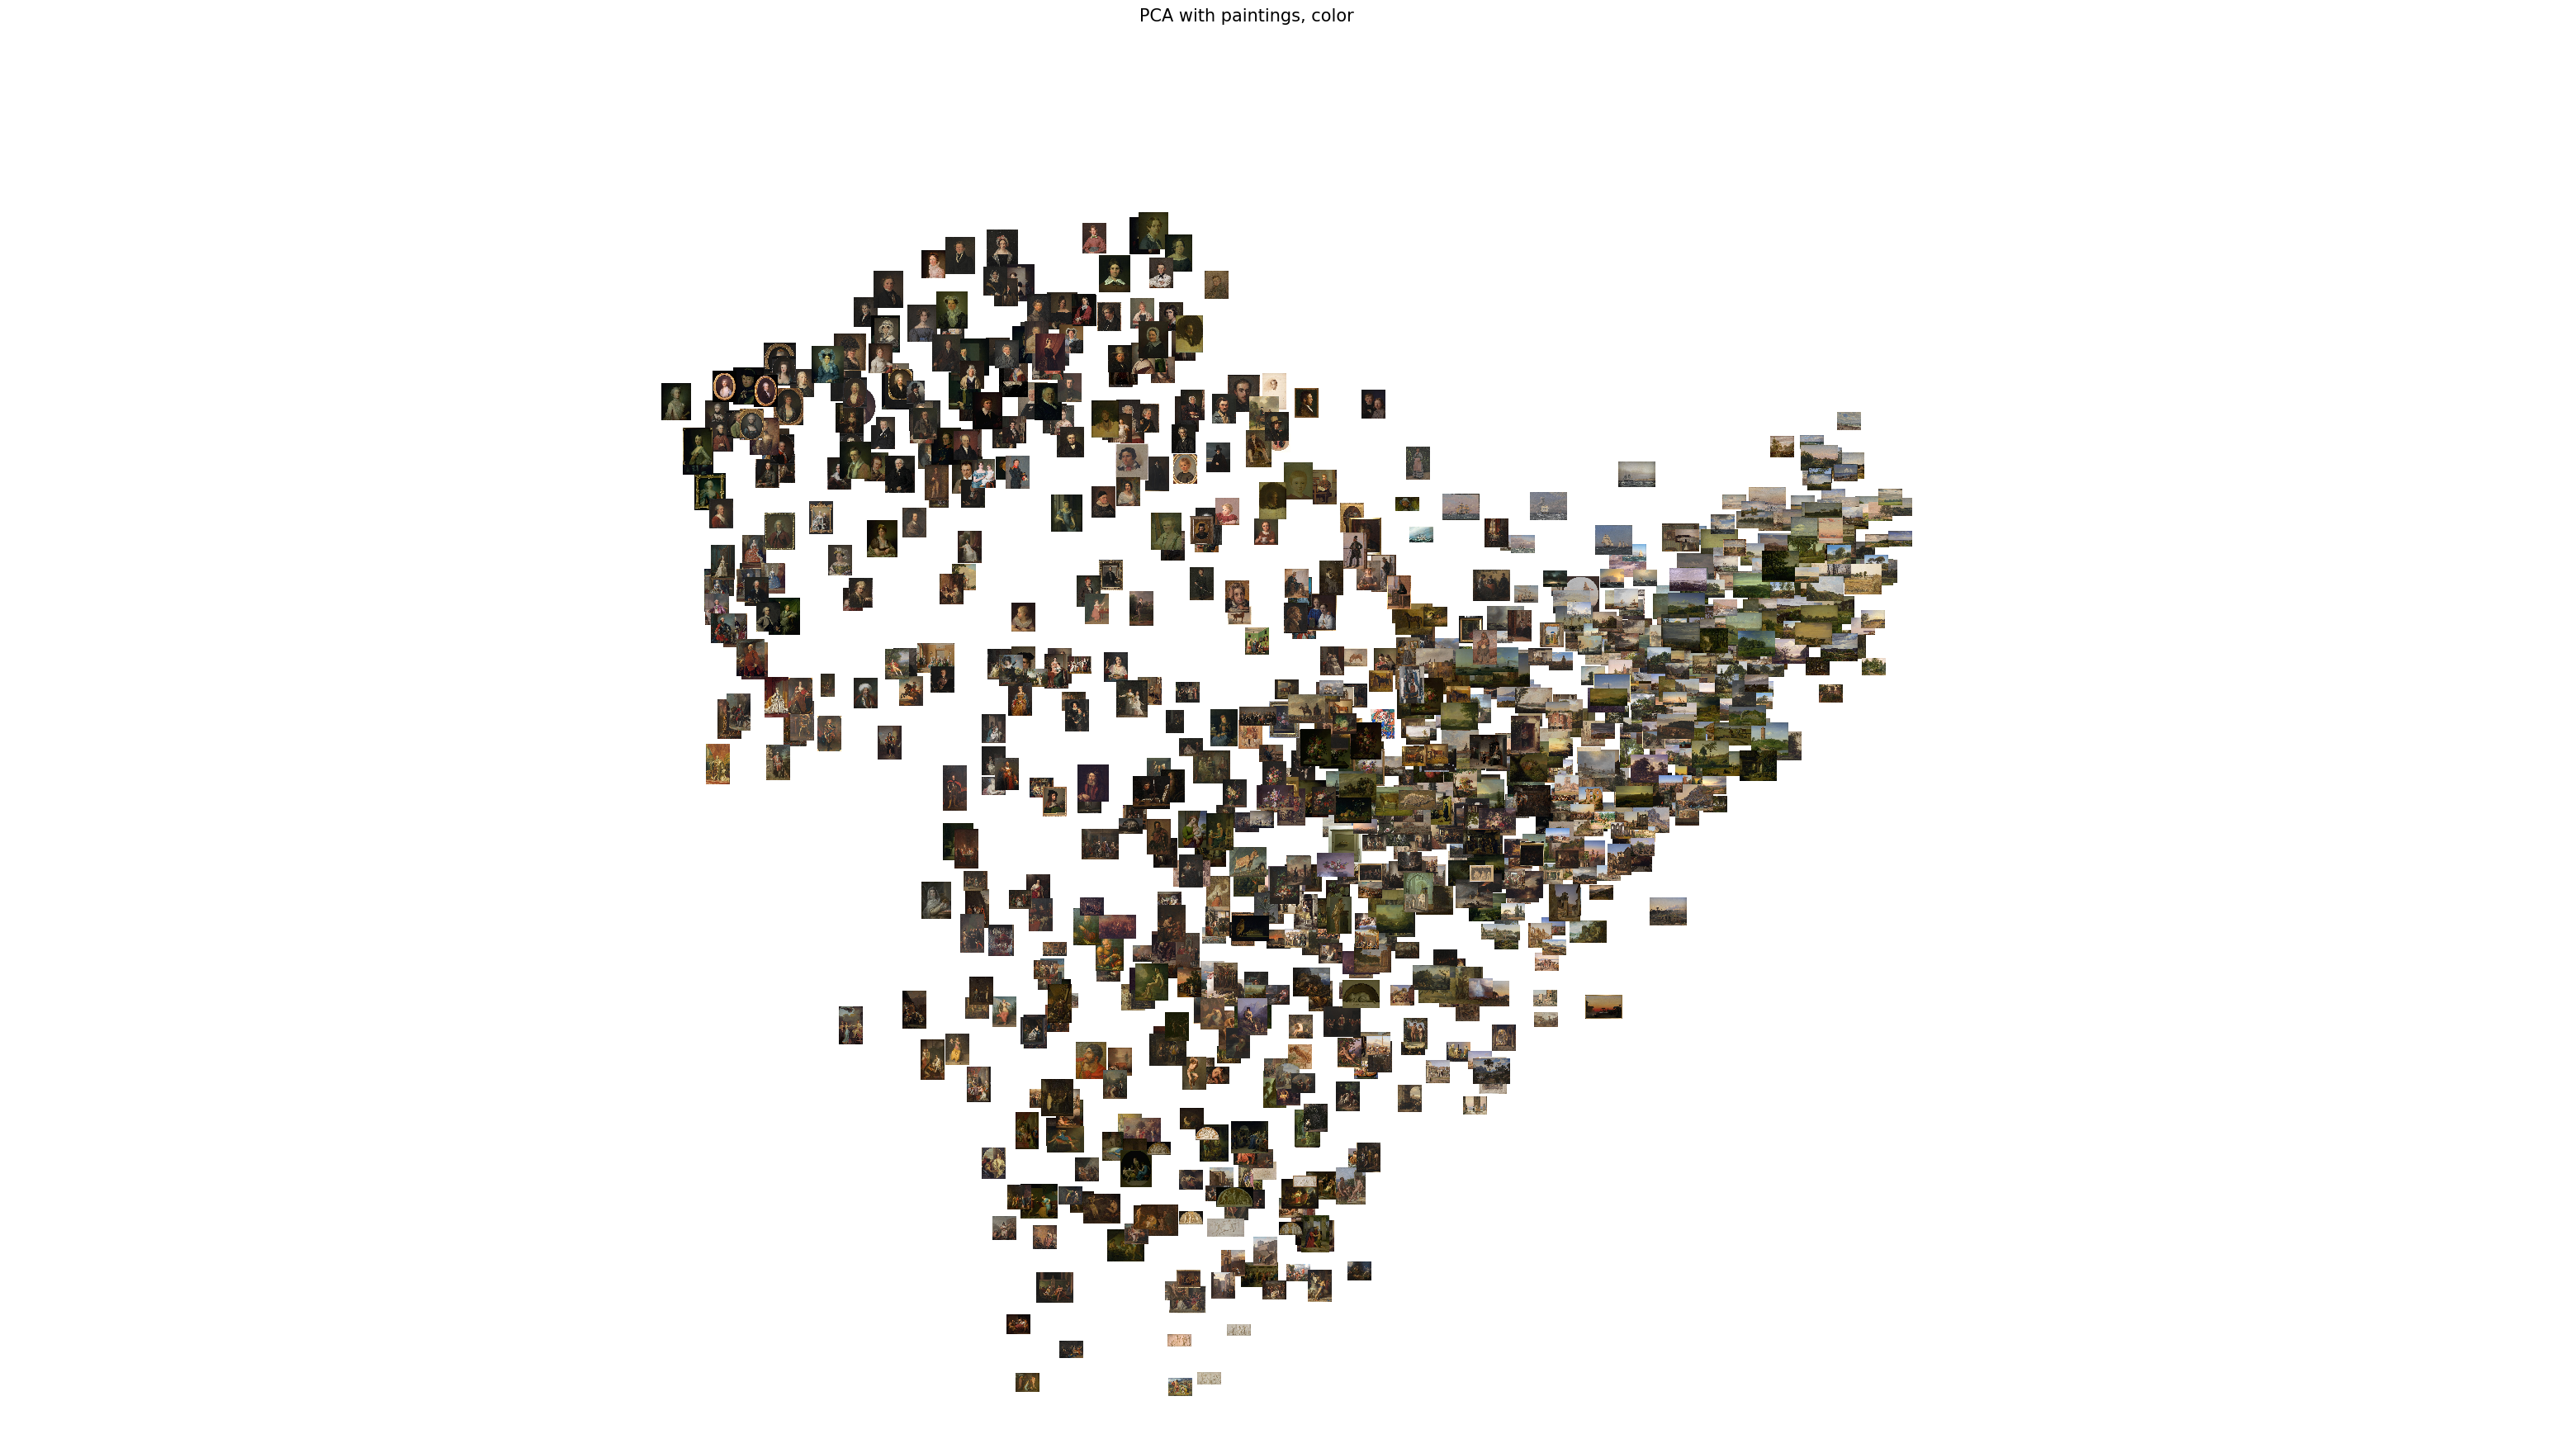

In [9]:
fig, axs = plt.subplots(1, 1, figsize=(40, 20))

pca_binary(axs, color_subset, ds_color, 'embedding', 'pca_paintings_color.png')

fig.suptitle('PCA with paintings, color', size = 15)

In [ ]:
# PCA first, then t-SNE 

In [ ]:
X = np.array(pca_features)
tsne = TSNE(n_components=2, learning_rate=150, perplexity=30, angle=0.2, verbose=2).fit_transform(X)

### Clustering approaches